In [1]:
import pandas as pd

import sys
import os
sys.path.append(os.path.abspath("../"))

from scripts.split_to_nix import split_currency_columns
from scripts.rename import rename_and_add_id
from scripts.convert_ds_to_date import convert_ds_to_date
from scripts.plot_time_series import plot_time_series
from scripts.aggregate_monthly_avg import aggregate_monthly_avg
from scripts.to_float import convert_y_to_float
from scripts.save_to_parquet import save_to_parquet

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("../data/cafe/cafe.csv")

In [4]:
df.head(10)

,Data,À vista R$,À vista US$
0,02/09/1996,"123,09","121,15"
1,03/09/1996,"119,68","117,69"
2,04/09/1996,"119,39","117,44"
3,05/09/1996,"118,42","116,38"
4,06/09/1996,"118,09","115,98"
5,09/09/1996,"117,3","115,11"
6,10/09/1996,"116,84","114,71"
7,11/09/1996,114,"111,94"
8,12/09/1996,"115,76","113,46"
9,13/09/1996,"115,97","113,84"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7088 entries, 0 to 7087
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data         7088 non-null   object
 1   À vista R$   7088 non-null   object
 2   À vista US$  7088 non-null   object
dtypes: object(3)
memory usage: 166.2+ KB


In [6]:
df_brl, df_usd = split_currency_columns(df)

In [7]:
df_brl.head(10)

,Data,À vista R$
0,02/09/1996,"123,09"
1,03/09/1996,"119,68"
2,04/09/1996,"119,39"
3,05/09/1996,"118,42"
4,06/09/1996,"118,09"
5,09/09/1996,"117,3"
6,10/09/1996,"116,84"
7,11/09/1996,114
8,12/09/1996,"115,76"
9,13/09/1996,"115,97"


In [8]:
df_usd.head(10)

,Data,À vista US$
0,02/09/1996,"121,15"
1,03/09/1996,"117,69"
2,04/09/1996,"117,44"
3,05/09/1996,"116,38"
4,06/09/1996,"115,98"
5,09/09/1996,"115,11"
6,10/09/1996,"114,71"
7,11/09/1996,"111,94"
8,12/09/1996,"113,46"
9,13/09/1996,"113,84"


In [9]:
cols_dict_brl = {
    'Data': 'ds',
    'À vista R$': 'y'
}

cols_dict_usd = {
    'Data': 'ds',
    'À vista US$': 'y'
}

In [10]:
unique_id = 'CAFE'
df_brl = rename_and_add_id(df_brl, cols_dict_brl, unique_id)
df_usd = rename_and_add_id(df_usd, cols_dict_usd, unique_id)

In [11]:
df_brl.head(10)

,ds,y,unique_id
0,02/09/1996,"123,09",CAFE
1,03/09/1996,"119,68",CAFE
2,04/09/1996,"119,39",CAFE
3,05/09/1996,"118,42",CAFE
4,06/09/1996,"118,09",CAFE
5,09/09/1996,"117,3",CAFE
6,10/09/1996,"116,84",CAFE
7,11/09/1996,114,CAFE
8,12/09/1996,"115,76",CAFE
9,13/09/1996,"115,97",CAFE


In [12]:
df_usd.head(10)

,ds,y,unique_id
0,02/09/1996,"121,15",CAFE
1,03/09/1996,"117,69",CAFE
2,04/09/1996,"117,44",CAFE
3,05/09/1996,"116,38",CAFE
4,06/09/1996,"115,98",CAFE
5,09/09/1996,"115,11",CAFE
6,10/09/1996,"114,71",CAFE
7,11/09/1996,"111,94",CAFE
8,12/09/1996,"113,46",CAFE
9,13/09/1996,"113,84",CAFE


In [13]:
df_brl = convert_ds_to_date(df_brl)
df_usd = convert_ds_to_date(df_usd)

df_brl = convert_y_to_float(df_brl)
df_usd = convert_y_to_float(df_usd)

In [14]:
df_brl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7088 entries, 0 to 7087
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         7088 non-null   datetime64[ns]
 1   y          7088 non-null   float64       
 2   unique_id  7088 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 166.2+ KB


In [15]:
df_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7088 entries, 0 to 7087
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         7088 non-null   datetime64[ns]
 1   y          7088 non-null   float64       
 2   unique_id  7088 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 166.2+ KB


In [16]:
df_brl = aggregate_monthly_avg(df_brl)
df_usd = aggregate_monthly_avg(df_usd)

In [17]:
df_brl.head(10)

,ds,y,unique_id
0,1996-09-01,116.819048,CAFE
1,1996-10-01,116.709545,CAFE
2,1996-11-01,119.234500,CAFE
3,1996-12-01,126.122105,CAFE
4,1997-01-01,159.765000,CAFE
5,1997-02-01,194.622353,CAFE
6,1997-03-01,218.448947,CAFE
7,1997-04-01,224.065714,CAFE
8,1997-05-01,252.319000,CAFE
9,1997-06-01,242.566667,CAFE


In [18]:
df_usd.head(10)

,ds,y,unique_id
0,1996-09-01,114.653810,CAFE
1,1996-10-01,113.870455,CAFE
2,1996-11-01,115.748500,CAFE
3,1996-12-01,121.624737,CAFE
4,1997-01-01,153.226818,CAFE
5,1997-02-01,185.540588,CAFE
6,1997-03-01,206.777368,CAFE
7,1997-04-01,211.251429,CAFE
8,1997-05-01,236.217000,CAFE
9,1997-06-01,225.792381,CAFE


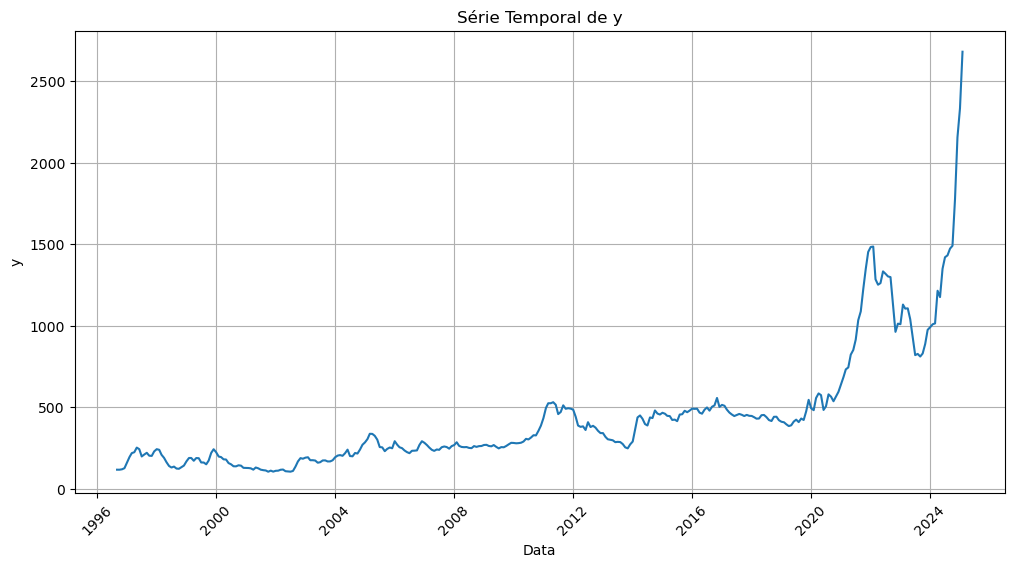

In [19]:
plot_time_series(df_brl, 'y')

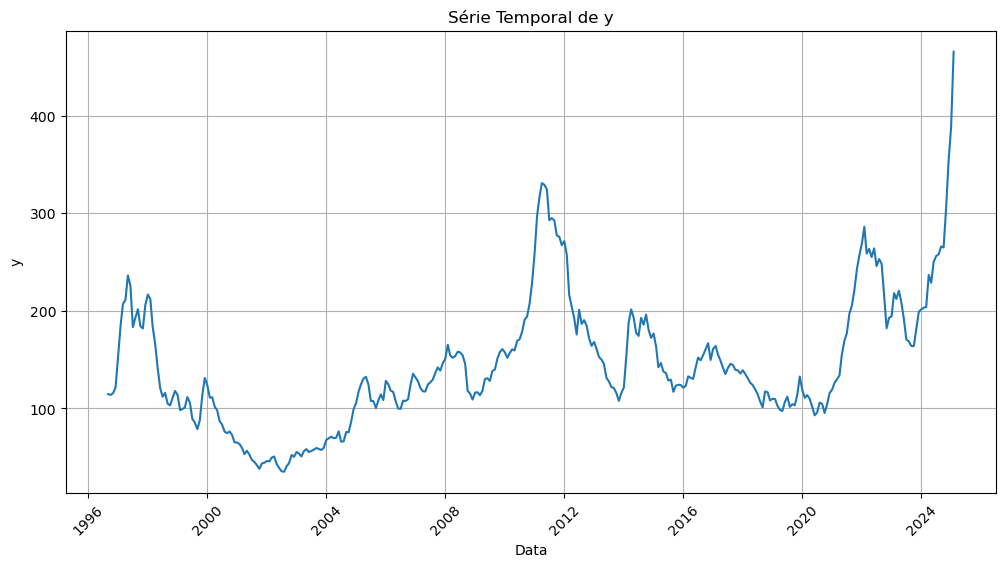

In [20]:
plot_time_series(df_usd, 'y')

In [21]:
save_to_parquet(df_brl, "../data/cafe/cafe_brl.parquet")
save_to_parquet(df_usd, "../data/cafe/cafe_usd.parquet")

Arquivo salvo em: ../data/cafe/cafe_brl.parquet
Arquivo salvo em: ../data/cafe/cafe_usd.parquet
